In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.14.5
pandas version :  0.23.1
xarray version :  0.10.7


In [36]:
sns.set_style('white')
sns.set_context('paper', font_scale=3)
sns.set_palette('hls', 6)
sns.set_style('ticks')

In [37]:
dir_p25  = "/archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ocean_Drake_Passage/ts/monthly/20yr"
dir_p5   = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle200/gfdl.ncrc4-intel16-prod/pp/ocean_Drake_Passage/ts/monthly/20yr"
dir_p5nn = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle500/gfdl.ncrc4-intel16-prod/pp/ocean_Drake_Passage/ts/monthly/20yr"

In [38]:
# There is a bug in the xarray time attribute that limits the years to < 2300. As 
# the p5n expt has been run out to >2300 year, I use a reduced time series file on /net/smg
#dir_p5n = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_p25config/gfdl.ncrc4-intel16-prod/pp/ocean_Drake_Passage/ts/monthly/20yr"
dir_p5n = "/net/smg/OWG/analysis/OM4_analysis/OM4p5_IAF_BLING_CFC_abio_csf_p25config/umo"

In [39]:
fname_p25 = dir_p25+"/ocean_Drake_Passage.*.umo.nc"
fname_p5  = dir_p5+"/ocean_Drake_Passage.*.umo.nc"
#fname_p5n = dir_p5n+"/ocean_Drake_Passage.*.umo.nc" 
fname_p5n   = dir_p5n+"/ocean_Drake_Passage.170801-200712.umo.nc" 
fname_p5nn  = dir_p5nn+"/ocean_Drake_Passage.*.umo.nc"

In [40]:
ds_p25  = xr.open_mfdataset(fname_p25)
ds_p5   = xr.open_mfdataset(fname_p5)
ds_p5nn = xr.open_mfdataset(fname_p5nn)
ds_p5n  = xr.open_mfdataset(fname_p5n)

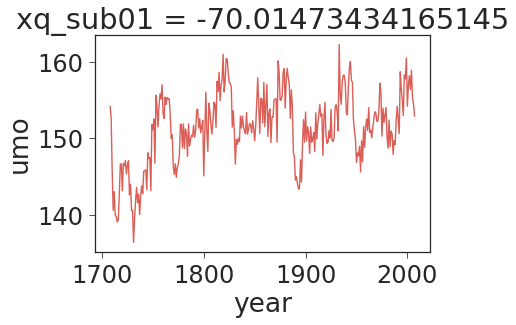

In [41]:
umo_p25   = ds_p25.umo
umo_p25
trans_p25 = umo_p25.sum('z_l').sum('yh_sub02')/1e9
DRAKE_p25_annual = trans_p25.groupby(trans_p25.time.dt.year).mean('time')
#print(DRAKE_p25_annual)
DRAKE_p25_annual.plot()

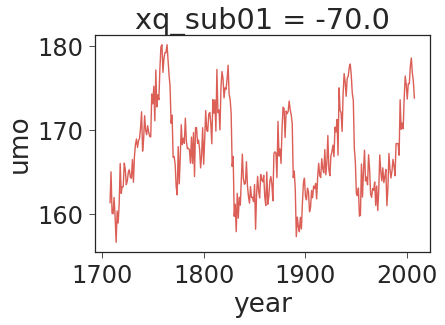

In [42]:
umo_p5   = ds_p5.umo
umo_p5
trans_p5 = umo_p5.sum('z_l').sum('yh_sub01')/1e9
#trans_p5.plot()
DRAKE_p5_annual = trans_p5.groupby(trans_p5.time.dt.year).mean('time')
#print(DRAKE_p5_annual)
DRAKE_p5_annual.plot()

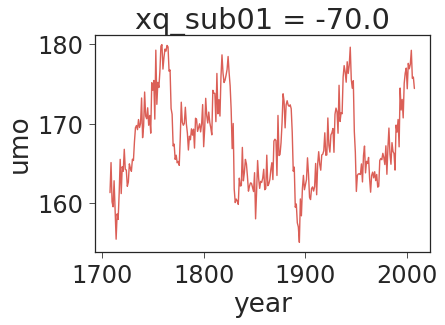

In [43]:
umo_p5nn   = ds_p5nn.umo
umo_p5nn
trans_p5nn = umo_p5nn.sum('z_l').sum('yh_sub01')/1e9
#trans_p5nn.plot()
DRAKE_p5nn_annual = trans_p5nn.groupby(trans_p5nn.time.dt.year).mean('time')
#print(DRAKE_p5nn_annual)
DRAKE_p5nn_annual.plot()

<xarray.DataArray 'umo' (year: 300, xq_sub01: 1)>
dask.array<shape=(300, 1), dtype=float32, chunksize=(1, 1)>
Coordinates:
  * xq_sub01  (xq_sub01) float64 -70.0
  * year      (year) int64 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 ...


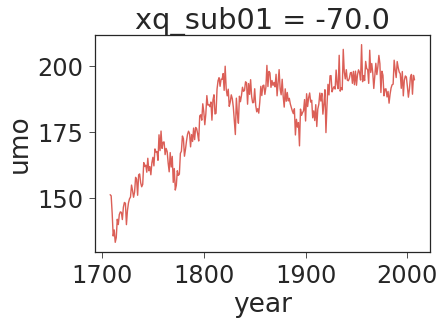

In [44]:
umo_p5n   = ds_p5n.umo
umo_p5n 
trans_p5n = umo_p5n.sum('z_l').sum('yh_sub01')/1e9
DRAKE_p5n_annual = trans_p5n.groupby(trans_p5n.time.dt.year).mean('time')
print(DRAKE_p5n_annual)
DRAKE_p5n_annual.plot()

In [45]:
DRAKE_p25_annual_mean  = DRAKE_p25_annual.mean('year')
DRAKE_p5_annual_mean   = DRAKE_p5_annual.mean('year')
DRAKE_p5n_annual_mean  = DRAKE_p5n_annual.mean('year')
DRAKE_p5nn_annual_mean = DRAKE_p5nn_annual.mean('year')

DRAKE_p25_annual_mean.values, DRAKE_p5_annual_mean.values, DRAKE_p5n_annual_mean.values, DRAKE_p5nn_annual_mean.values

(array([151.3858], dtype=float32),
 array([167.55885], dtype=float32),
 array([181.5017], dtype=float32),
 array([168.0538], dtype=float32))

In [46]:
DRAKE_p25_annual_anom  = DRAKE_p25_annual  - DRAKE_p25_annual_mean
DRAKE_p5_annual_anom   = DRAKE_p5_annual   - DRAKE_p5_annual_mean
DRAKE_p5n_annual_anom  = DRAKE_p5n_annual  - DRAKE_p5n_annual_mean
DRAKE_p5nn_annual_anom = DRAKE_p5nn_annual - DRAKE_p5nn_annual_mean

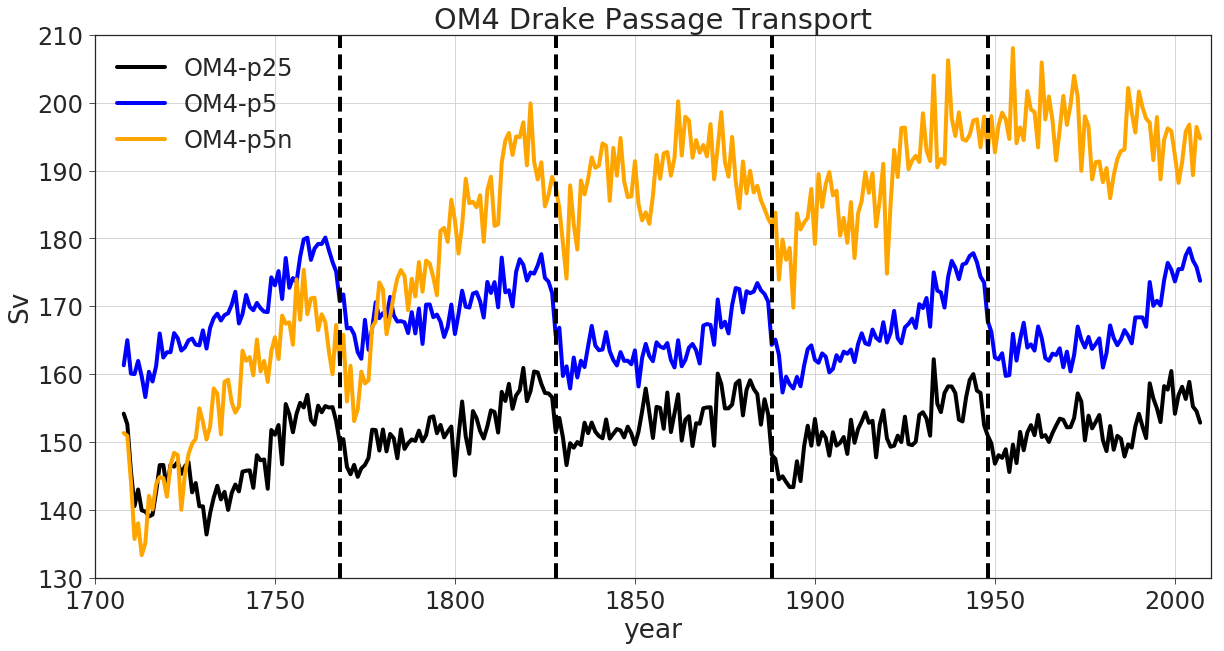

In [62]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(20,10))
DRAKE_p25_annual.plot(ax=axis, label='OM4-p25', linestyle='solid', color='black', linewidth=4) 
DRAKE_p5_annual.plot(ax=axis, label='OM4-p5',  linestyle='solid', color='blue', linewidth=4) 
DRAKE_p5n_annual.plot(ax=axis, label='OM4-p5n', linestyle='solid', color='orange', linewidth=4) 
#DRAKE_p5nn_annual.plot(ax=axis, label='OM4-p5nn', linestyle='solid', color='green', linewidth=4) 
#DRAKE_p5nn_annual.plot(ax=axis, label='OM4-p5nn', linestyle='solid', color='green', linewidth=4) 

plt.axvline(x=1768,color='k',linestyle='--',linewidth=4)
plt.axvline(x=1828,color='k',linestyle='--',linewidth=4)
plt.axvline(x=1888,color='k',linestyle='--',linewidth=4)
plt.axvline(x=1948,color='k',linestyle='--',linewidth=4)

axis.legend(loc='upper left')
axis.set_ylim([130,210])
axis.set_xlim([1700,2010])
axis.set_ylabel('Sv')
axis.grid()
axis.set_title('OM4 Drake Passage Transport')
fig.savefig('./figures/OM4_drake_transport_allcycles.png', bbox_inches='tight', dpi=200)

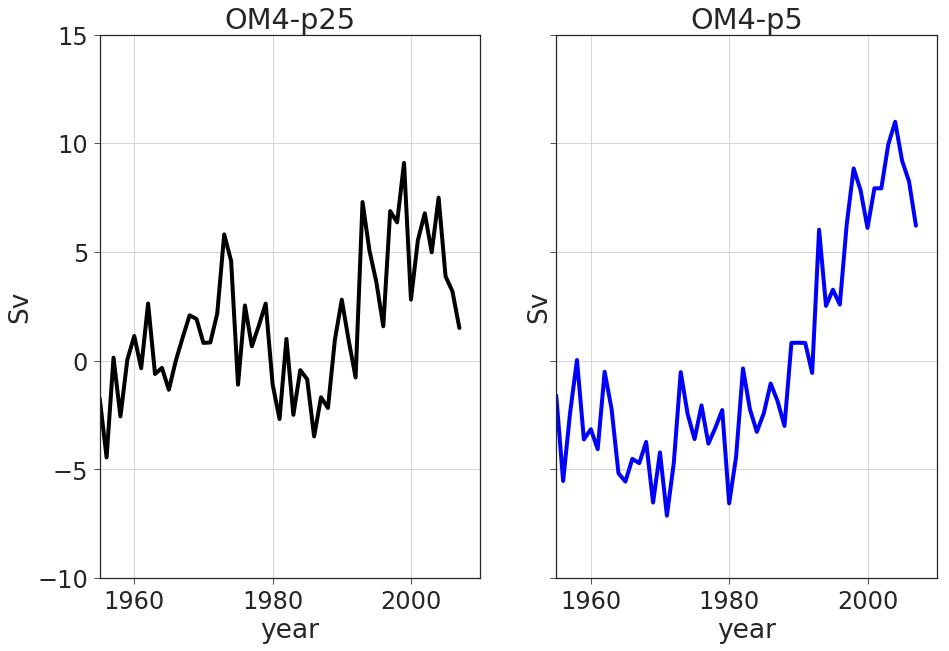

In [48]:
fig, (axis1,axis2) = plt.subplots(ncols=2, nrows=1, figsize=(15,10), sharex='all', sharey='all')

DRAKE_p25_annual_anom.plot(ax=axis1, label='OM4-p25', linestyle='solid', color='black', linewidth=4) 
DRAKE_p5_annual_anom.plot(ax=axis2, label='OM4-p5',  linestyle='solid', color='blue', linewidth=4) 
#DRAKE_p5n_annual_anom.plot_mean(ax=axis, label='OM4-p5n', linestyle='solid', color='orange', linewidth=4) 

#axis1.legend(loc='upper left')
axis1.set_ylim([-10,15])
axis1.set_xlim([1955,2010])
axis1.set_ylabel('Sv')
axis1.grid()
axis1.set_title('OM4-p25')

#axis2.legend(loc='upper left')
axis2.set_ylim([-10,15])
axis2.set_xlim([1955,2010])
axis2.set_ylabel('Sv')
axis2.grid()
axis2.set_title('OM4-p5')


fig.savefig('./figures/OM4_drake_transport_5thcycle.png', bbox_inches='tight', dpi=200)

In [49]:
# pd.date_range(start='1708-04', periods=len(ds.DRAKE_p25_annual.year), freq='YS')

In [50]:
ds['year'] = pd.date_range(start='1708', periods=len(ds.DRAKE_p25_annual.year), freq='YS')

NameError: name 'ds' is not defined

In [ ]:
ds.year

In [ ]:
ds_tau.TAUUO_ANN_p25.max('YH6_378').plot()

In [ ]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

axis2 = axis.twinx()

ln1 = ds.DRAKE_p25_annual.plot(ax=axis, color='green', label='Drake Transport')
ln2 = ds_tau.TAUUO_ANN_p25.max('YH6_378').plot(ax=axis2, color='blue', label='max zonal winds' )

axis.set_xlim(['1940', '2010'])
axis.set_xlabel(' ')
axis.set_ylabel('SV')
axis2.set_ylabel('N/m^2')
axis.set_title('OM4-p25 Drake Passage Transport and Max Zonal Winds')

# create joint label
lns = ln1+ln2
labs = [l.get_label() for l in lns]
axis.legend(lns, labs, loc='lower right')
fig.savefig('./figures/OM4_drake_transport_vs_winds.png', bbox_inches='tight', dpi=200)